# CV Skill Plot Generator

In [85]:
import sys

In [86]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [87]:
import os
from datetime import datetime
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from pydantic import BaseModel, ValidationError

In [88]:
%load_ext yamlmagic

The yamlmagic extension is already loaded. To reload it, use:
  %reload_ext yamlmagic


## Edit skills

Change list according your skill set

In [89]:
%%yaml skills
skill_groups:
- name: LNG
  skills:
  - name: C#
    value: 70
  - name: Python
    value: 80
  - name: JavaScript
    value: 40
  - name: Objective-C
    value: 30
- name: OS
  skills:
  - name: Linux
    value: 80
  - name: Windows
    value: 60
  - name: MacOS
    value: 40
- name: DB
  skills:
  - name: MongoDB
    value: 40
  - name: PostgreSQL
    value: 30
  - name: Redis
    value: 60
- name: CLOUD
  skills:
  - name: AWS
    value: 20
  - name: Azure
    value: 20
  - name: GCP
    value: 70
- name: COM
  skills:
  - name: REST
    value: 80
  - name: ModBus
    value: 50
  - name: GraphQL
    value: 20
  - name: TCP/UDP
    value: 50
  - name: SPI
    value: 30
  - name: MQTT
    value: 60
- name: MISC
  skills:
  - name: Mixed Reality
    value: 40
  - name: Web
    value: 60
  - name: Drones
    value: 80
  - name: Measurement technology
    value: 60
  - name: Unit
    value: 50
- name: DEVOPS
  skills:
  - name: GIT
    value: 80
  - name: GitHub
    value: 30
  - name: GitLab
    value: 70
  - name: Travis CI
    value: 40
  - name: Docker
    value: 80

<IPython.core.display.Javascript object>

In [90]:
skills

{'skill_groups': [{'name': 'LNG',
   'skills': [{'name': 'C#', 'value': 70},
    {'name': 'Python', 'value': 80},
    {'name': 'JavaScript', 'value': 40},
    {'name': 'Objective-C', 'value': 30}]},
  {'name': 'OS',
   'skills': [{'name': 'Linux', 'value': 80},
    {'name': 'Windows', 'value': 60},
    {'name': 'MacOS', 'value': 40}]},
  {'name': 'DB',
   'skills': [{'name': 'MongoDB', 'value': 40},
    {'name': 'PostgreSQL', 'value': 30},
    {'name': 'Redis', 'value': 60}]},
  {'name': 'CLOUD',
   'skills': [{'name': 'AWS', 'value': 20},
    {'name': 'Azure', 'value': 20},
    {'name': 'GCP', 'value': 70}]},
  {'name': 'COM',
   'skills': [{'name': 'REST', 'value': 80},
    {'name': 'ModBus', 'value': 50},
    {'name': 'GraphQL', 'value': 20},
    {'name': 'TCP/UDP', 'value': 50},
    {'name': 'SPI', 'value': 30},
    {'name': 'MQTT', 'value': 60},
    {'name': 'LoRa', 'value': 10}]},
  {'name': 'MISC',
   'skills': [{'name': 'Mixed Reality', 'value': 40},
    {'name': 'Web', 'value'

## Load Skills

### Define Skill File Model

In [91]:
class Skill(BaseModel):
    name: str
    value: int

class SkillGroup(BaseModel):
    name: str
    skills: List[Skill]

class CVSkills(BaseModel):
    skill_groups: List[SkillGroup]

### Load Skill File

In [92]:
try:
    cv_skills = CVSkills(**skills)
    print(cv_skills)
except ValidationError as e:
    print(f"Failed to parse the skills: {e}")


skill_groups=[SkillGroup(name='LNG', skills=[Skill(name='C#', value=70), Skill(name='Python', value=80), Skill(name='JavaScript', value=40), Skill(name='Objective-C', value=30)]), SkillGroup(name='OS', skills=[Skill(name='Linux', value=80), Skill(name='Windows', value=60), Skill(name='MacOS', value=40)]), SkillGroup(name='DB', skills=[Skill(name='MongoDB', value=40), Skill(name='PostgreSQL', value=30), Skill(name='Redis', value=60)]), SkillGroup(name='CLOUD', skills=[Skill(name='AWS', value=20), Skill(name='Azure', value=20), Skill(name='GCP', value=70)]), SkillGroup(name='COM', skills=[Skill(name='REST', value=80), Skill(name='ModBus', value=50), Skill(name='GraphQL', value=20), Skill(name='TCP/UDP', value=50), Skill(name='SPI', value=30), Skill(name='MQTT', value=60), Skill(name='LoRa', value=10)]), SkillGroup(name='MISC', skills=[Skill(name='Mixed Reality', value=40), Skill(name='Web', value=60), Skill(name='Drones', value=80), Skill(name='Measurement technology', value=60), Skill(n

### Map to DataFrame

In [93]:
# Create empty lists to store the extracted values
names = []
values = []
groups = []

# Iterate over the skill groups and skills, and extract the required values
for skill_group in cv_skills.skill_groups:
    for skill in skill_group.skills:
        names.append(skill.name)
        values.append(skill.value)
        groups.append(skill_group.name)

# Create a dictionary with the extracted values
data = {
    "name": names,
    "value": values,
    "group": groups
}

# Create a pandas DataFrame using the dictionary
df = pd.DataFrame(data)
df

,name,value,group
0,C#,70,LNG
1,Python,80,LNG
2,JavaScript,40,LNG
3,Objective-C,30,LNG
4,Linux,80,OS
5,Windows,60,OS
6,MacOS,40,OS
7,MongoDB,40,DB
8,PostgreSQL,30,DB
9,Redis,60,DB


### Sort Values

In [94]:
df = df.groupby(["group"]).apply(lambda x: x.sort_values(["value"], ascending = False)).reset_index(drop=True)
df

,name,value,group
0,GCP,70,CLOUD
1,AWS,20,CLOUD
2,Azure,20,CLOUD
3,REST,80,COM
4,MQTT,60,COM
5,ModBus,50,COM
6,TCP/UDP,50,COM
7,SPI,30,COM
8,GraphQL,20,COM
9,LoRa,10,COM


## Draw Plot

### Function Definitions

We are defining three functions here:

- `get_label_rotation` is used to determine the rotation and alignment of the label based on a given angle.
- `add_labels` is used to add labels to the bars in our bar chart.
- `create_out_file_path` is used to create a unique file path for our output based on the current date and time.


In [95]:
import numpy as np
import os
from datetime import datetime

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

def add_labels(angles, values, labels, offset, ax):
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

def create_out_file_path():
    # get the current date and time
    now = datetime.now()

    # format the datetime object to a string
    timestamp_str = now.strftime("%Y%m%d_%H%M%S")  # This will give you a string like '20230607_183000'


    # create the filename using the original file name and the timestamp string
    file_name = "skills" + "_" + timestamp_str + ".png"  # This will give you a string like 'originalfile_20230607_183000.txt'

    # combine the directory path with the filename
    full_file_path = os.path.abspath(file_name)

    return full_file_path


### Creating The Polar Plot

We are creating a polar bar plot. To do this, we:
- Initialize a polar plot.
- Set the theta offset, plot limits, and remove grid lines.
- Plot our bars with appropriate widths and colors.
- Add our labels.
- Add reference lines and group annotations.
- Save the figure.


Plot saved to: f:\__Life\Admin\Papier\Bewerbung\Ressourcen\Diagrams\skills_20230607_161731.png


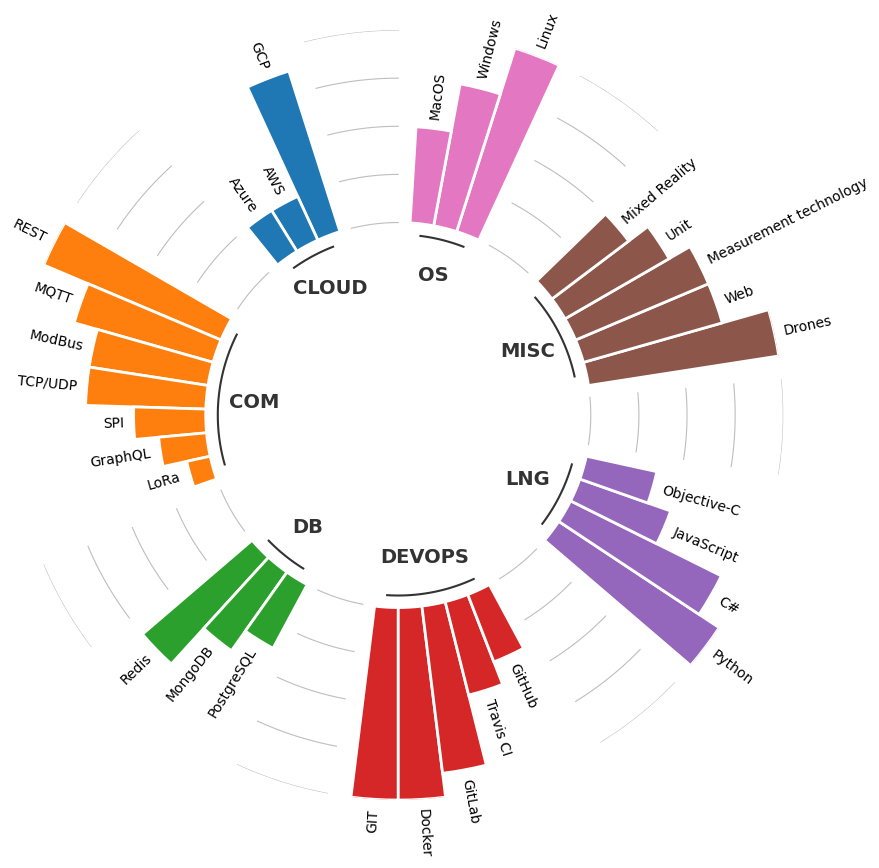

In [96]:
# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2
VALUES = df["value"].values
MAX_VALUE = VALUES.max()
LABELS = df["name"].values
GROUP = df["group"].values
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)
IDXS = []

GROUPS = df.groupby(['group']).size().reset_index(name='size')

GROUPS_SIZE = GROUPS['size'].tolist()
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

offset = 0 


for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-MAX_VALUE, MAX_VALUE)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])


ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(GROUPS['group'].tolist(), GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=MAX_VALUE)
    ax.plot(x1, [-5] * MAX_VALUE, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=MAX_VALUE)
    ax.plot(x2, [0] * MAX_VALUE, color="#bebebe", lw=0.8)
    ax.plot(x2, [20] * MAX_VALUE, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * MAX_VALUE, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * MAX_VALUE, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * MAX_VALUE, color="#bebebe", lw=0.8)
    
    offset += size + PAD
    

out_file_path = create_out_file_path()
plt.savefig(out_file_path, transparent=True, bbox_inches='tight')

print(f"Plot saved to: {out_file_path}")